In [53]:
import pandas as pd
from matplotlib import pyplot as plt

In [54]:
df = pd.read_csv('Android/performances.csv')
df[['warmup', 'init', 'inference']] /= 1000  # microseconds to milliseconds

In [55]:
means = df.groupby(df.model).mean()
errors = df.groupby(df.model).std()

# change index order
means = means.reindex(['neumf', 'ecam neumf', 'mobile'])
errors = errors.reindex(['neumf', 'ecam neumf', 'mobile'])

means = means[['warmup', 'inference', 'init']] # change columns order
means.index.name = None # remove index name

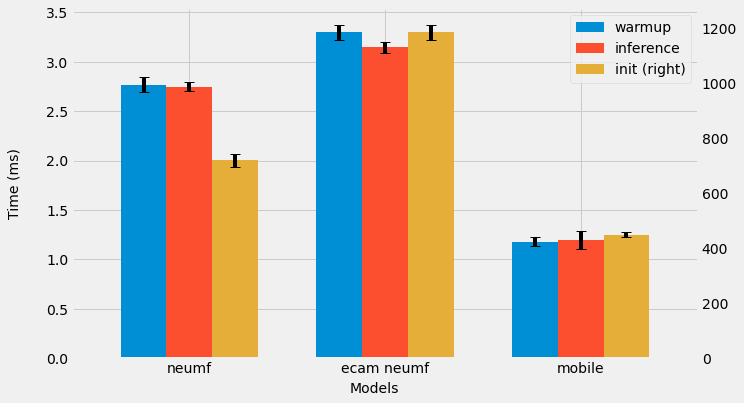

In [56]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

means.plot(kind= 'bar', 
           secondary_y= 'init', 
           rot=0,  # don't rotate model name
           yerr=errors, # standard deviation
           capsize=5, # std cap size
           width=0.7,
           ax=ax,
           grid=True)

plt.grid(axis='both')
plt.style.use("fivethirtyeight")
fig.text(0.5, -0.01, 'Models', ha='center') # write on x axis
fig.text(0, 0.4, 'Time (ms)', ha='center', rotation='vertical') # write on y axis
plt.show()